In [27]:
import numpy as np
import random
import scipy
from math import log
from tqdm import tqdm
from OMP import *
import matplotlib.pyplot as plt 
import os

Noiseless case

In [28]:
def run_noiseless(N_list,times = 2000):
            
        for N in N_list:
            s_max_range = range(N//2,N,3)
            if N==20:
                M_list = range(1,2*N,3)
            elif N==50:
                M_list = range(1,2*N,5)
            else:
                M_list = range(1,141,5)
                
            ESR_map = np.zeros((len(s_max_range),len(M_list)))
            Error_map = np.zeros((len(s_max_range),len(M_list)))
            for i in range(len(M_list)):
                M=M_list[i]
                for j in range(len(s_max_range)):
                    s_max = s_max_range[j]
                    esr_count= 0
                    norm_error = 0
                    for e_id in tqdm(range(times)):
                        s = np.random.randint(low=1,high=s_max)
                        A = gen_A(m=M,n=N)
                        x,true_index = gen_x(s,N)
                        y = A.dot(x)
                        x_pre,pred_index = OMP(A,y,N,error_thresh=0.001)
                        
                        norm_error += np.linalg.norm(x-x_pre) / np.linalg.norm(x) 
                        
                        if set(true_index)==set(pred_index):
                            esr_count+=1
                    norm_error/=times
                    esr_count/=times
                    
                    Error_map[j,i]=norm_error
                    ESR_map[j,i] = esr_count
                    print("ESR rate for M={} and N={} {}".format(M,N,esr_count))
                    print("Normalized_Error for M={} and N={} {}".format(M,N,norm_error))
            
            np.save("Noise_less/N{}_ESR_rate.npy".format(N),ESR_map)
            np.save("Noise_less/N{}_Norm_error.npy".format(N),Error_map)
            print("N={} finished".format(N))   

In [29]:
run_noiseless(N_list=[20,50,100])

100%|██████████| 2000/2000 [00:00<00:00, 5154.66it/s]


ESR rate for M=1 and N=20 0.0065
Normalized_Error for M=1 and N=20 1.3309393229152442


100%|██████████| 2000/2000 [00:00<00:00, 4926.16it/s]


ESR rate for M=1 and N=20 0.005
Normalized_Error for M=1 and N=20 1.3285758400132843


100%|██████████| 2000/2000 [00:00<00:00, 4629.67it/s]


ESR rate for M=1 and N=20 0.003
Normalized_Error for M=1 and N=20 1.3296054921411649


100%|██████████| 2000/2000 [00:00<00:00, 4347.87it/s]


ESR rate for M=1 and N=20 0.002
Normalized_Error for M=1 and N=20 1.3115614944336846


100%|██████████| 2000/2000 [00:00<00:00, 3616.62it/s]


ESR rate for M=4 and N=20 0.151
Normalized_Error for M=4 and N=20 1.0085587854596856


100%|██████████| 2000/2000 [00:00<00:00, 3294.89it/s]


ESR rate for M=4 and N=20 0.1155
Normalized_Error for M=4 and N=20 1.0668742398804285


100%|██████████| 2000/2000 [00:00<00:00, 3215.45it/s]


ESR rate for M=4 and N=20 0.0935
Normalized_Error for M=4 and N=20 1.0927454249149342


100%|██████████| 2000/2000 [00:00<00:00, 3100.80it/s]


ESR rate for M=4 and N=20 0.0725
Normalized_Error for M=4 and N=20 1.1247526663374232


100%|██████████| 2000/2000 [00:00<00:00, 2980.64it/s]


ESR rate for M=7 and N=20 0.2515
Normalized_Error for M=7 and N=20 0.7875499086404126


100%|██████████| 2000/2000 [00:00<00:00, 2789.42it/s]


ESR rate for M=7 and N=20 0.183
Normalized_Error for M=7 and N=20 0.8912345750020633


100%|██████████| 2000/2000 [00:00<00:00, 2686.68it/s]


ESR rate for M=7 and N=20 0.1595
Normalized_Error for M=7 and N=20 0.9273392085795975


100%|██████████| 2000/2000 [00:00<00:00, 2564.11it/s]


ESR rate for M=7 and N=20 0.1265
Normalized_Error for M=7 and N=20 0.9825823872798891


100%|██████████| 2000/2000 [00:00<00:00, 2607.58it/s]


ESR rate for M=10 and N=20 0.3805
Normalized_Error for M=10 and N=20 0.5627929786875736


100%|██████████| 2000/2000 [00:00<00:00, 2436.06it/s]


ESR rate for M=10 and N=20 0.284
Normalized_Error for M=10 and N=20 0.6890219464578766


100%|██████████| 2000/2000 [00:00<00:00, 2288.34it/s]


ESR rate for M=10 and N=20 0.213
Normalized_Error for M=10 and N=20 0.7856551725294364


100%|██████████| 2000/2000 [00:00<00:00, 2189.63it/s]


ESR rate for M=10 and N=20 0.183
Normalized_Error for M=10 and N=20 0.8234996175047322


100%|██████████| 2000/2000 [00:00<00:00, 2360.11it/s]


ESR rate for M=13 and N=20 0.5105
Normalized_Error for M=13 and N=20 0.3477361531904895


100%|██████████| 2000/2000 [00:00<00:00, 2155.17it/s]


ESR rate for M=13 and N=20 0.408
Normalized_Error for M=13 and N=20 0.45877000204299645


100%|██████████| 2000/2000 [00:00<00:00, 2022.25it/s]


ESR rate for M=13 and N=20 0.3075
Normalized_Error for M=13 and N=20 0.5655665416800008


100%|██████████| 2000/2000 [00:01<00:00, 1901.14it/s]


ESR rate for M=13 and N=20 0.2755
Normalized_Error for M=13 and N=20 0.6304246197072043


100%|██████████| 2000/2000 [00:00<00:00, 2403.85it/s]


ESR rate for M=16 and N=20 0.6745
Normalized_Error for M=16 and N=20 0.1336938330700261


100%|██████████| 2000/2000 [00:00<00:00, 2070.39it/s]


ESR rate for M=16 and N=20 0.5045
Normalized_Error for M=16 and N=20 0.246948691258987


100%|██████████| 2000/2000 [00:01<00:00, 1811.60it/s]


ESR rate for M=16 and N=20 0.3825
Normalized_Error for M=16 and N=20 0.36534440007383845


100%|██████████| 2000/2000 [00:01<00:00, 1730.11it/s]


ESR rate for M=16 and N=20 0.343
Normalized_Error for M=16 and N=20 0.4269767560566795


100%|██████████| 2000/2000 [00:01<00:00, 1826.48it/s]


ESR rate for M=19 and N=20 0.774
Normalized_Error for M=19 and N=20 0.026028096747554262


100%|██████████| 2000/2000 [00:01<00:00, 1587.30it/s]


ESR rate for M=19 and N=20 0.651
Normalized_Error for M=19 and N=20 0.05619814716523781


 80%|████████  | 1604/2000 [00:01<00:00, 1309.39it/s]


KeyboardInterrupt: 

(4, 13)
(9, 20)
(17, 28)


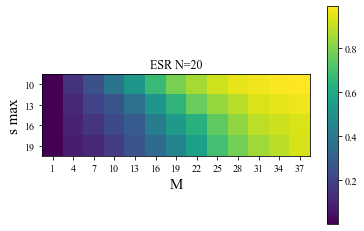

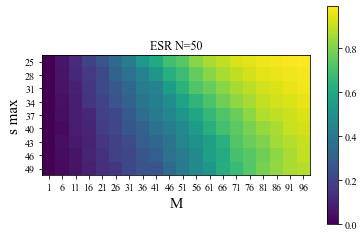

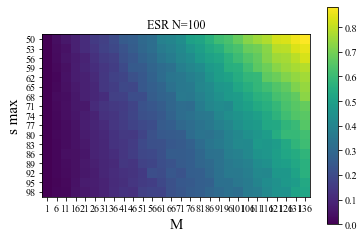

In [30]:
plt.rcParams["font.family"] = "Times New Roman"
Ns=[20,50,100]
for N in Ns:
    name_ESR = 'Noise_less/N{}_ESR_rate'.format(N)
    image_ESR = np.load('{}.npy'.format(name_ESR))

    plt.figure()
    print(image_ESR.shape)
    plt.imshow(image_ESR)
    ytick = range(N//2,N,3)
    if N==20:
        xtick = range(1,2*N,3)
    elif N==50:
        xtick = range(1,2*N,5)
    else:
        xtick =range(1,141,5)
    plt.xticks(np.arange(len(xtick)),xtick)
    plt.yticks(np.arange(len(ytick)),ytick)
    plt.xlabel('M',fontsize=15)
    plt.ylabel('s max',fontsize=15)
    plt.title("ESR N={}".format(N))
    plt.colorbar()
    plt.savefig('plots/noiseless/N{}_ESR_rate.png'.format(N))

(4, 13)
(9, 20)
(17, 28)


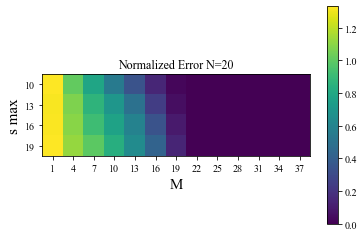

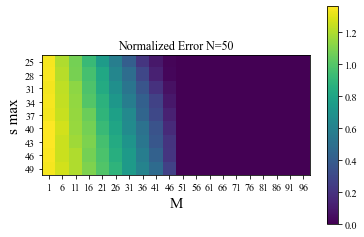

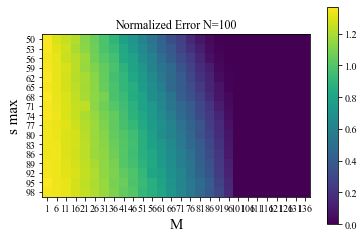

In [31]:
for N in Ns:
    name_Norm = 'Noise_less/N{}_Norm_error'.format(N)
    image_Norm = np.load('{}.npy'.format(name_Norm))

    plt.figure()
    print(image_Norm.shape)
    plt.imshow(image_Norm)
    ytick = range(N//2,N,3)
    if N==20:
        xtick = range(1,2*N,3)
    elif N==50:
        xtick = range(1,2*N,5)
    else:
        xtick =range(1,141,5)
    plt.xticks(np.arange(len(xtick)),xtick)
    plt.yticks(np.arange(len(ytick)),ytick)
    plt.xlabel('M',fontsize=15)
    plt.ylabel('s max',fontsize=15)
    
    plt.title("Normalized Error N={}".format(N))
    plt.colorbar()
    plt.savefig('plots/noiseless/N{}_Norm_error.png'.format(N))

Noisy case with known sparsity

In [33]:
def run_noise_s(N_list,variance=0.001,times = 2000):
            
        for N in N_list:
            s_max_range = range(N//2,N,3)
            if N==20:
                M_list = range(1,2*N,3)
            elif N==50:
                M_list = range(1,2*N,5)
            else:
                M_list = range(1,141,5)
                
                
            
            ESR_map = np.zeros((len(s_max_range),len(M_list)))
            Error_map = np.zeros((len(s_max_range),len(M_list)))
            for i in range(len(M_list)):
                M=M_list[i]
                for j in range(len(s_max_range)):
                    s_max = s_max_range[j]
                    esr_count= 0
                    norm_error = 0
                    for e_id in tqdm(range(times)):
                        s = np.random.randint(low=1,high=s_max)
                        A = gen_A(m=M,n=N)
                        x,true_index = gen_x(s,N)                        
                        y = A.dot(x)
                        y_noise,noise=gen_noise(y, variance)
                        x_pre,pred_index = OMP(A,y_noise,stop=s)
                        error=np.linalg.norm(x-x_pre) / np.linalg.norm(x)
                        norm_error += error 
                        
                        if error<0.001:
                            esr_count+=1
                    norm_error/=times
                    esr_count/=times
                    
                    Error_map[j,i]=norm_error
                    ESR_map[j,i] = esr_count
                    print("ESR rate for M={} and N={} {}".format(M,N,esr_count))
                    print("Normalized_Error for M={} and N={} {}".format(M,N,norm_error))
            
            np.save("Noise_known_s/N{}_ESR_rate_s_{}.npy".format(N,variance),ESR_map)
#             np.save("Noise_known_s/N{}_Norm_error_s_{}.npy".format(N,variance),Error_map)
            print("N={} finished".format(N))

In [35]:
run_noise_s(N_list=[20,50,100],variance=0.001)

100%|██████████| 2000/2000 [00:00<00:00, 5063.33it/s]


ESR rate for M=1 and N=20 0.006
Normalized_Error for M=1 and N=20 1.3270364696357255


100%|██████████| 2000/2000 [00:00<00:00, 4750.65it/s]


ESR rate for M=1 and N=20 0.003
Normalized_Error for M=1 and N=20 1.3274056432221213


100%|██████████| 2000/2000 [00:00<00:00, 4504.52it/s]


ESR rate for M=1 and N=20 0.001
Normalized_Error for M=1 and N=20 1.3319449158494132


100%|██████████| 2000/2000 [00:00<00:00, 4184.12it/s]


ESR rate for M=1 and N=20 0.004
Normalized_Error for M=1 and N=20 1.3299421519819226


100%|██████████| 2000/2000 [00:00<00:00, 3610.13it/s]


ESR rate for M=4 and N=20 0.1215
Normalized_Error for M=4 and N=20 1.0482620458135723


100%|██████████| 2000/2000 [00:00<00:00, 3389.88it/s]


ESR rate for M=4 and N=20 0.11
Normalized_Error for M=4 and N=20 1.0623975239402679


100%|██████████| 2000/2000 [00:00<00:00, 3278.68it/s]


ESR rate for M=4 and N=20 0.098
Normalized_Error for M=4 and N=20 1.083808505225759


100%|██████████| 2000/2000 [00:00<00:00, 3058.11it/s]


ESR rate for M=4 and N=20 0.0585
Normalized_Error for M=4 and N=20 1.1427865024564972


100%|██████████| 2000/2000 [00:00<00:00, 3164.57it/s]


ESR rate for M=7 and N=20 0.254
Normalized_Error for M=7 and N=20 0.7744184635133253


100%|██████████| 2000/2000 [00:00<00:00, 2906.93it/s]


ESR rate for M=7 and N=20 0.165
Normalized_Error for M=7 and N=20 0.890180118563563


100%|██████████| 2000/2000 [00:00<00:00, 2628.12it/s]


ESR rate for M=7 and N=20 0.1385
Normalized_Error for M=7 and N=20 0.9468478593437927


100%|██████████| 2000/2000 [00:00<00:00, 2531.63it/s]


ESR rate for M=7 and N=20 0.106
Normalized_Error for M=7 and N=20 0.9854345530631551


100%|██████████| 2000/2000 [00:00<00:00, 2881.86it/s]


ESR rate for M=10 and N=20 0.357
Normalized_Error for M=10 and N=20 0.5854301951313694


100%|██████████| 2000/2000 [00:00<00:00, 2617.81it/s]


ESR rate for M=10 and N=20 0.2785
Normalized_Error for M=10 and N=20 0.6754323691496072


100%|██████████| 2000/2000 [00:00<00:00, 2400.96it/s]


ESR rate for M=10 and N=20 0.213
Normalized_Error for M=10 and N=20 0.7703702100943572


100%|██████████| 2000/2000 [00:00<00:00, 2317.50it/s]


ESR rate for M=10 and N=20 0.183
Normalized_Error for M=10 and N=20 0.833366850117528


100%|██████████| 2000/2000 [00:00<00:00, 2763.02it/s]


ESR rate for M=13 and N=20 0.518
Normalized_Error for M=13 and N=20 0.3535928872758093


100%|██████████| 2000/2000 [00:00<00:00, 2453.98it/s]


ESR rate for M=13 and N=20 0.381
Normalized_Error for M=13 and N=20 0.4867180769119794


100%|██████████| 2000/2000 [00:00<00:00, 2229.66it/s]


ESR rate for M=13 and N=20 0.3195
Normalized_Error for M=13 and N=20 0.5736602177966712


100%|██████████| 2000/2000 [00:00<00:00, 2000.00it/s]


ESR rate for M=13 and N=20 0.2405
Normalized_Error for M=13 and N=20 0.675251761993651


100%|██████████| 2000/2000 [00:00<00:00, 2706.37it/s]


ESR rate for M=16 and N=20 0.6625
Normalized_Error for M=16 and N=20 0.1826644535629863


100%|██████████| 2000/2000 [00:00<00:00, 2341.91it/s]


ESR rate for M=16 and N=20 0.504
Normalized_Error for M=16 and N=20 0.3007625969292094


100%|██████████| 2000/2000 [00:00<00:00, 2087.68it/s]


ESR rate for M=16 and N=20 0.406
Normalized_Error for M=16 and N=20 0.3872652533332292


100%|██████████| 2000/2000 [00:01<00:00, 1915.71it/s]


ESR rate for M=16 and N=20 0.3315
Normalized_Error for M=16 and N=20 0.45331811932094446


100%|██████████| 2000/2000 [00:00<00:00, 2061.86it/s]


ESR rate for M=19 and N=20 0.802
Normalized_Error for M=19 and N=20 0.09216966524511559


100%|██████████| 2000/2000 [00:01<00:00, 1886.79it/s]


ESR rate for M=19 and N=20 0.65
Normalized_Error for M=19 and N=20 0.1636708067838931


100%|██████████| 2000/2000 [00:01<00:00, 1603.84it/s]


ESR rate for M=19 and N=20 0.5315
Normalized_Error for M=19 and N=20 0.22075589553207609


100%|██████████| 2000/2000 [00:01<00:00, 1441.96it/s]


ESR rate for M=19 and N=20 0.428
Normalized_Error for M=19 and N=20 0.27139747032207673


 36%|███▋      | 728/2000 [00:00<00:00, 1871.44it/s]


KeyboardInterrupt: 

In [36]:
run_noise_s(N_list=[20,50,100],variance=0.1)

100%|██████████| 2000/2000 [00:00<00:00, 5128.24it/s]


ESR rate for M=1 and N=20 0.0
Normalized_Error for M=1 and N=20 1.3354985797300458


100%|██████████| 2000/2000 [00:00<00:00, 4672.96it/s]


ESR rate for M=1 and N=20 0.0
Normalized_Error for M=1 and N=20 1.3296933693366768


100%|██████████| 2000/2000 [00:00<00:00, 4494.43it/s]


ESR rate for M=1 and N=20 0.0
Normalized_Error for M=1 and N=20 1.3282247865505865


100%|██████████| 2000/2000 [00:00<00:00, 4264.40it/s]


ESR rate for M=1 and N=20 0.0
Normalized_Error for M=1 and N=20 1.3390802310815029


100%|██████████| 2000/2000 [00:00<00:00, 3649.66it/s]


ESR rate for M=4 and N=20 0.005
Normalized_Error for M=4 and N=20 1.011387658766951


100%|██████████| 2000/2000 [00:00<00:00, 3401.39it/s]


ESR rate for M=4 and N=20 0.0055
Normalized_Error for M=4 and N=20 1.0882039989392491


100%|██████████| 2000/2000 [00:00<00:00, 3215.46it/s]


ESR rate for M=4 and N=20 0.005
Normalized_Error for M=4 and N=20 1.096546084375827


100%|██████████| 2000/2000 [00:00<00:00, 3067.49it/s]


ESR rate for M=4 and N=20 0.0035
Normalized_Error for M=4 and N=20 1.150423902907034


100%|██████████| 2000/2000 [00:00<00:00, 3154.60it/s]


ESR rate for M=7 and N=20 0.0055
Normalized_Error for M=7 and N=20 0.8050741224004898


100%|██████████| 2000/2000 [00:00<00:00, 2923.99it/s]


ESR rate for M=7 and N=20 0.0055
Normalized_Error for M=7 and N=20 0.8699940888595253


100%|██████████| 2000/2000 [00:00<00:00, 2673.80it/s]


ESR rate for M=7 and N=20 0.0035
Normalized_Error for M=7 and N=20 0.948489378655854


100%|██████████| 2000/2000 [00:00<00:00, 2649.01it/s]


ESR rate for M=7 and N=20 0.001
Normalized_Error for M=7 and N=20 0.9705263071800804


100%|██████████| 2000/2000 [00:00<00:00, 2936.86it/s]


ESR rate for M=10 and N=20 0.004
Normalized_Error for M=10 and N=20 0.5777281223582108


100%|██████████| 2000/2000 [00:00<00:00, 2610.97it/s]


ESR rate for M=10 and N=20 0.005
Normalized_Error for M=10 and N=20 0.6972160126809965


100%|██████████| 2000/2000 [00:00<00:00, 2415.47it/s]


ESR rate for M=10 and N=20 0.002
Normalized_Error for M=10 and N=20 0.7520969124081062


100%|██████████| 2000/2000 [00:00<00:00, 2192.99it/s]


ESR rate for M=10 and N=20 0.0035
Normalized_Error for M=10 and N=20 0.8258730801563934


100%|██████████| 2000/2000 [00:00<00:00, 2699.06it/s]


ESR rate for M=13 and N=20 0.0035
Normalized_Error for M=13 and N=20 0.36423292892059034


100%|██████████| 2000/2000 [00:00<00:00, 2427.19it/s]


ESR rate for M=13 and N=20 0.005
Normalized_Error for M=13 and N=20 0.4786732258315183


100%|██████████| 2000/2000 [00:00<00:00, 2197.80it/s]


ESR rate for M=13 and N=20 0.0045
Normalized_Error for M=13 and N=20 0.5755041600509094


100%|██████████| 2000/2000 [00:00<00:00, 2066.11it/s]


ESR rate for M=13 and N=20 0.0015
Normalized_Error for M=13 and N=20 0.6621700063915268


100%|██████████| 2000/2000 [00:00<00:00, 2724.80it/s]


ESR rate for M=16 and N=20 0.0085
Normalized_Error for M=16 and N=20 0.2036366276444895


100%|██████████| 2000/2000 [00:00<00:00, 2322.89it/s]


ESR rate for M=16 and N=20 0.005
Normalized_Error for M=16 and N=20 0.3059259800455868


100%|██████████| 2000/2000 [00:00<00:00, 2118.65it/s]


ESR rate for M=16 and N=20 0.004
Normalized_Error for M=16 and N=20 0.40310663660329626


100%|██████████| 2000/2000 [00:01<00:00, 1906.58it/s]


ESR rate for M=16 and N=20 0.002
Normalized_Error for M=16 and N=20 0.4634602741180844


100%|██████████| 2000/2000 [00:00<00:00, 2047.10it/s]


ESR rate for M=19 and N=20 0.004
Normalized_Error for M=19 and N=20 0.11371694448764538


100%|██████████| 2000/2000 [00:01<00:00, 1917.54it/s]


ESR rate for M=19 and N=20 0.001
Normalized_Error for M=19 and N=20 0.17402805119997306


100%|██████████| 2000/2000 [00:01<00:00, 1615.51it/s]


ESR rate for M=19 and N=20 0.0035
Normalized_Error for M=19 and N=20 0.23174008280063385


 96%|█████████▌| 1922/2000 [00:01<00:00, 1447.29it/s]


KeyboardInterrupt: 

(4, 13)
(9, 20)
(17, 28)


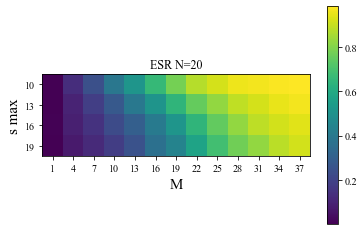

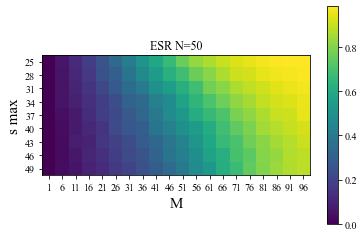

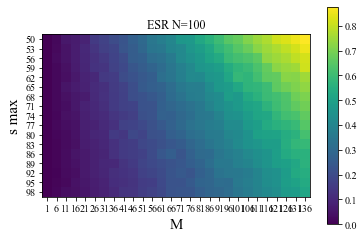

In [37]:
Ns=[20,50,100]
for N in Ns:
    # image = np.load('Noise2_N{}_sigma0.001.npy'.format(N))
    # name = 'N{}_ESR_rate'.format(N)
    name_ESR = 'Noise_known_s/N{}_ESR_rate_s_0.001'.format(N)
    image_ESR = np.load('{}.npy'.format(name_ESR))

    plt.figure()
    print(image_ESR.shape)
    plt.imshow(image_ESR)
    ytick = range(N//2,N,3)
    if N==20:
        xtick = range(1,2*N,3)
    elif N==50:
        xtick = range(1,2*N,5)
    else:
        xtick =range(1,141,5)
    plt.xticks(np.arange(len(xtick)),xtick)
    plt.yticks(np.arange(len(ytick)),ytick)
    plt.xlabel('M',fontsize=15)
    plt.ylabel('s max',fontsize=15)
    plt.title("ESR N={}".format(N))
    plt.colorbar()
    plt.savefig('plots/noise_known_s/N{}_ESR_rate_s_0.001.png'.format(N))

(4, 13)
(9, 20)
(17, 28)


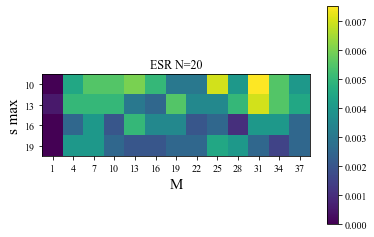

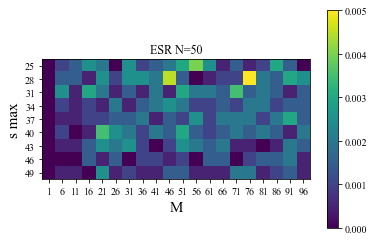

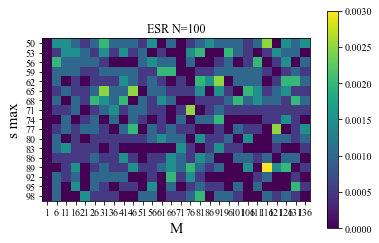

In [38]:
Ns=[20,50,100]
for N in Ns:
    # image = np.load('Noise2_N{}_sigma0.001.npy'.format(N))
    # name = 'N{}_ESR_rate'.format(N)
    name_ESR = 'Noise_known_s/N{}_ESR_rate_s_0.1'.format(N)
    image_ESR = np.load('{}.npy'.format(name_ESR))

    plt.figure()
    print(image_ESR.shape)
    plt.imshow(image_ESR)
    ytick = range(N//2,N,3)
    if N==20:
        xtick = range(1,2*N,3)
    elif N==50:
        xtick = range(1,2*N,5)
    else:
        xtick =range(1,141,5)
    plt.xticks(np.arange(len(xtick)),xtick)
    plt.yticks(np.arange(len(ytick)),ytick)
    plt.xlabel('M',fontsize=15)
    plt.ylabel('s max',fontsize=15)
    plt.title("ESR N={}".format(N))
    plt.colorbar()
    plt.savefig('plots/noise_known_s/N{}_ESR_rate_s_0.1.png'.format(N))

Noisy case with unknown sparsity and known noise norm

In [39]:
def run_noise_unknown(N_list,variance=0.001,times = 2000):
            
        for N in N_list:
            s_max_range = range(N//2,N,3)
            if N==20:
                M_list = range(1,2*N,3)
            elif N==50:
                M_list = range(1,2*N,5)
            else:
                M_list = range(1,141,5)
                                            
            ESR_map = np.zeros((len(s_max_range),len(M_list)))
            Error_map = np.zeros((len(s_max_range),len(M_list)))
            for i in range(len(M_list)):
                M=M_list[i]
                for j in range(len(s_max_range)):
                    s_max = s_max_range[j]
                    esr_count= 0
                    norm_error = 0
                    for e_id in tqdm(range(times)):
                        s = np.random.randint(low=1,high=s_max)
                        A = gen_A(m=M,n=N)
                        x,true_index = gen_x(s,N)                        
                        y = A.dot(x)
                        y_noise,noise_norm=gen_noise(y, variance)
                        x_pre,pred_index = OMP(A,y_noise,error_thresh=noise_norm)
                        error=np.linalg.norm(x-x_pre) / np.linalg.norm(x)
                        norm_error += error 
                        
                        if error<0.001:
                            esr_count+=1
                    norm_error/=times
                    esr_count/=times
                    
                    Error_map[j,i]=norm_error
                    ESR_map[j,i] = esr_count
                    print("ESR rate for M={} and N={} {}".format(M,N,esr_count))
                    print("Normalized_Error for M={} and N={} {}".format(M,N,norm_error))
            

            np.save("Noise_unknown_s/N{}_ESR_rate_s_{}.npy".format(N,variance),ESR_map)
#             np.save("Noise_unknown_s/N{}_Norm_error_s_{}.npy".format(N,variance),Error_map)
            print("N={} finished".format(N))   

In [40]:
run_noise_unknown(N_list=[20,50,100],variance=0.001)

100%|██████████| 2000/2000 [00:00<00:00, 5154.63it/s]


ESR rate for M=1 and N=20 0.0035
Normalized_Error for M=1 and N=20 1.3393638226175693


100%|██████████| 2000/2000 [00:00<00:00, 4640.39it/s]


ESR rate for M=1 and N=20 0.004
Normalized_Error for M=1 and N=20 1.3249152741473904


100%|██████████| 2000/2000 [00:00<00:00, 4524.90it/s]


ESR rate for M=1 and N=20 0.0035
Normalized_Error for M=1 and N=20 1.33693014846287


100%|██████████| 2000/2000 [00:00<00:00, 4228.34it/s]


ESR rate for M=1 and N=20 0.002
Normalized_Error for M=1 and N=20 1.330331454789123


100%|██████████| 2000/2000 [00:00<00:00, 3571.45it/s]


ESR rate for M=4 and N=20 0.142
Normalized_Error for M=4 and N=20 1.0230345356789043


100%|██████████| 2000/2000 [00:00<00:00, 3338.91it/s]


ESR rate for M=4 and N=20 0.097
Normalized_Error for M=4 and N=20 1.0780493237197546


100%|██████████| 2000/2000 [00:00<00:00, 3200.83it/s]


ESR rate for M=4 and N=20 0.0825
Normalized_Error for M=4 and N=20 1.1109285576077832


100%|██████████| 2000/2000 [00:00<00:00, 3030.31it/s]


ESR rate for M=4 and N=20 0.068
Normalized_Error for M=4 and N=20 1.1398213666446115


100%|██████████| 2000/2000 [00:00<00:00, 2901.53it/s]


ESR rate for M=7 and N=20 0.231
Normalized_Error for M=7 and N=20 0.7945116226193


100%|██████████| 2000/2000 [00:00<00:00, 2306.81it/s]


ESR rate for M=7 and N=20 0.172
Normalized_Error for M=7 and N=20 0.8908960689544146


100%|██████████| 2000/2000 [00:00<00:00, 2531.64it/s]


ESR rate for M=7 and N=20 0.136
Normalized_Error for M=7 and N=20 0.9515435160737954


100%|██████████| 2000/2000 [00:00<00:00, 2515.73it/s]


ESR rate for M=7 and N=20 0.1155
Normalized_Error for M=7 and N=20 0.9755726341186203


100%|██████████| 2000/2000 [00:00<00:00, 2200.22it/s]


ESR rate for M=10 and N=20 0.372
Normalized_Error for M=10 and N=20 0.5808306802542286


100%|██████████| 2000/2000 [00:00<00:00, 2366.88it/s]


ESR rate for M=10 and N=20 0.2905
Normalized_Error for M=10 and N=20 0.6899154992785661


100%|██████████| 2000/2000 [00:00<00:00, 2197.81it/s]


ESR rate for M=10 and N=20 0.2445
Normalized_Error for M=10 and N=20 0.7603284265165697


100%|██████████| 2000/2000 [00:00<00:00, 2157.50it/s]


ESR rate for M=10 and N=20 0.1995
Normalized_Error for M=10 and N=20 0.8175251525368032


100%|██████████| 2000/2000 [00:00<00:00, 2361.28it/s]


ESR rate for M=13 and N=20 0.568
Normalized_Error for M=13 and N=20 0.3373200191209499


100%|██████████| 2000/2000 [00:00<00:00, 2098.64it/s]


ESR rate for M=13 and N=20 0.426
Normalized_Error for M=13 and N=20 0.4693105037296822


100%|██████████| 2000/2000 [00:01<00:00, 1994.02it/s]


ESR rate for M=13 and N=20 0.348
Normalized_Error for M=13 and N=20 0.5705864785313541


100%|██████████| 2000/2000 [00:01<00:00, 1883.21it/s]


ESR rate for M=13 and N=20 0.2925
Normalized_Error for M=13 and N=20 0.6390080269016105


100%|██████████| 2000/2000 [00:00<00:00, 2344.68it/s]


ESR rate for M=16 and N=20 0.8075
Normalized_Error for M=16 and N=20 0.13035298078768404


100%|██████████| 2000/2000 [00:00<00:00, 2053.38it/s]


ESR rate for M=16 and N=20 0.64
Normalized_Error for M=16 and N=20 0.24437280397400687


100%|██████████| 2000/2000 [00:01<00:00, 1841.63it/s]


ESR rate for M=16 and N=20 0.4985
Normalized_Error for M=16 and N=20 0.3509892207021956


100%|██████████| 2000/2000 [00:01<00:00, 1702.13it/s]


ESR rate for M=16 and N=20 0.392
Normalized_Error for M=16 and N=20 0.45606053643336764


100%|██████████| 2000/2000 [00:01<00:00, 1876.18it/s]


ESR rate for M=19 and N=20 0.9475
Normalized_Error for M=19 and N=20 0.022573296335864492


100%|██████████| 2000/2000 [00:01<00:00, 1589.82it/s]


ESR rate for M=19 and N=20 0.8755
Normalized_Error for M=19 and N=20 0.05295307788060448


100%|██████████| 2000/2000 [00:01<00:00, 1273.08it/s]


ESR rate for M=19 and N=20 0.767
Normalized_Error for M=19 and N=20 0.10988791992023814


100%|██████████| 2000/2000 [00:01<00:00, 1269.04it/s]


ESR rate for M=19 and N=20 0.7025
Normalized_Error for M=19 and N=20 0.1337997425884385


100%|██████████| 2000/2000 [00:01<00:00, 1998.00it/s]


ESR rate for M=22 and N=20 0.9955
Normalized_Error for M=22 and N=20 0.00020794309816327906


 42%|████▏     | 831/2000 [00:00<00:00, 1713.39it/s]


KeyboardInterrupt: 

In [41]:
run_noise_unknown(N_list=[20,50,100],variance=0.1)

100%|██████████| 2000/2000 [00:00<00:00, 4987.56it/s]


ESR rate for M=1 and N=20 0.0
Normalized_Error for M=1 and N=20 1.3269308070795307


100%|██████████| 2000/2000 [00:00<00:00, 4672.90it/s]


ESR rate for M=1 and N=20 0.0005
Normalized_Error for M=1 and N=20 1.3368281240883646


100%|██████████| 2000/2000 [00:00<00:00, 4474.30it/s]


ESR rate for M=1 and N=20 0.0005
Normalized_Error for M=1 and N=20 1.3314327640392263


100%|██████████| 2000/2000 [00:00<00:00, 4184.11it/s]


ESR rate for M=1 and N=20 0.0
Normalized_Error for M=1 and N=20 1.3368373240720943


100%|██████████| 2000/2000 [00:00<00:00, 3636.38it/s]


ESR rate for M=4 and N=20 0.0065
Normalized_Error for M=4 and N=20 1.0276093840056661


100%|██████████| 2000/2000 [00:00<00:00, 3311.28it/s]


ESR rate for M=4 and N=20 0.0065
Normalized_Error for M=4 and N=20 1.0751697729904581


100%|██████████| 2000/2000 [00:00<00:00, 3262.64it/s]


ESR rate for M=4 and N=20 0.005
Normalized_Error for M=4 and N=20 1.107295654510483


100%|██████████| 2000/2000 [00:00<00:00, 3139.72it/s]


ESR rate for M=4 and N=20 0.0025
Normalized_Error for M=4 and N=20 1.136672513955706


100%|██████████| 2000/2000 [00:00<00:00, 3025.70it/s]


ESR rate for M=7 and N=20 0.0055
Normalized_Error for M=7 and N=20 0.7925529491778663


100%|██████████| 2000/2000 [00:00<00:00, 2844.95it/s]


ESR rate for M=7 and N=20 0.0025
Normalized_Error for M=7 and N=20 0.8835951979027651


100%|██████████| 2000/2000 [00:00<00:00, 2728.52it/s]


ESR rate for M=7 and N=20 0.0015
Normalized_Error for M=7 and N=20 0.9543207578857363


100%|██████████| 2000/2000 [00:00<00:00, 2635.05it/s]


ESR rate for M=7 and N=20 0.0035
Normalized_Error for M=7 and N=20 0.9801918929048943


100%|██████████| 2000/2000 [00:00<00:00, 2600.78it/s]


ESR rate for M=10 and N=20 0.006
Normalized_Error for M=10 and N=20 0.5865258785988755


100%|██████████| 2000/2000 [00:00<00:00, 2518.90it/s]


ESR rate for M=10 and N=20 0.003
Normalized_Error for M=10 and N=20 0.6762936212663752


100%|██████████| 2000/2000 [00:00<00:00, 2301.49it/s]


ESR rate for M=10 and N=20 0.0025
Normalized_Error for M=10 and N=20 0.7854305497354609


100%|██████████| 2000/2000 [00:00<00:00, 2178.65it/s]


ESR rate for M=10 and N=20 0.0035
Normalized_Error for M=10 and N=20 0.8161259482343246


100%|██████████| 2000/2000 [00:00<00:00, 2496.90it/s]


ESR rate for M=13 and N=20 0.0035
Normalized_Error for M=13 and N=20 0.36480060110861956


100%|██████████| 2000/2000 [00:00<00:00, 2242.16it/s]


ESR rate for M=13 and N=20 0.0035
Normalized_Error for M=13 and N=20 0.49997230621144984


100%|██████████| 2000/2000 [00:00<00:00, 2085.51it/s]


ESR rate for M=13 and N=20 0.002
Normalized_Error for M=13 and N=20 0.5927535288881083


100%|██████████| 2000/2000 [00:01<00:00, 1992.03it/s]


ESR rate for M=13 and N=20 0.0025
Normalized_Error for M=13 and N=20 0.6659137938799919


100%|██████████| 2000/2000 [00:00<00:00, 2424.25it/s]


ESR rate for M=16 and N=20 0.007
Normalized_Error for M=16 and N=20 0.1612053658543415


100%|██████████| 2000/2000 [00:00<00:00, 2147.24it/s]


ESR rate for M=16 and N=20 0.0045
Normalized_Error for M=16 and N=20 0.26624067911985044


100%|██████████| 2000/2000 [00:01<00:00, 1949.32it/s]


ESR rate for M=16 and N=20 0.0005
Normalized_Error for M=16 and N=20 0.3605960867092575


100%|██████████| 2000/2000 [00:01<00:00, 1824.82it/s]


ESR rate for M=16 and N=20 0.002
Normalized_Error for M=16 and N=20 0.4275506973288822


100%|██████████| 2000/2000 [00:01<00:00, 1986.10it/s]


ESR rate for M=19 and N=20 0.0075
Normalized_Error for M=19 and N=20 0.052093056269012436


100%|██████████| 2000/2000 [00:01<00:00, 1603.85it/s]


ESR rate for M=19 and N=20 0.0035
Normalized_Error for M=19 and N=20 0.09637057470312728


100%|██████████| 2000/2000 [00:01<00:00, 1488.10it/s]


ESR rate for M=19 and N=20 0.0025
Normalized_Error for M=19 and N=20 0.13885282538677812


 27%|██▋       | 543/2000 [00:00<00:01, 1239.73it/s]


KeyboardInterrupt: 

(4, 13)
(9, 20)
(17, 28)


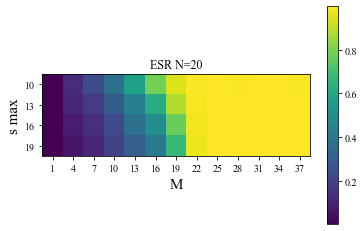

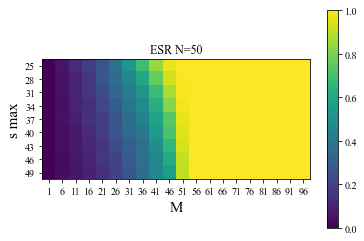

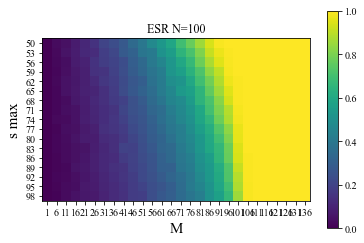

In [42]:
Ns=[20,50,100]
for N in Ns:
    # image = np.load('Noise2_N{}_sigma0.001.npy'.format(N))
    # name = 'N{}_ESR_rate'.format(N)
    name_ESR = 'Noise_unknown_s/N{}_ESR_rate_s_0.001'.format(N)
    image_ESR = np.load('{}.npy'.format(name_ESR))

    plt.figure()
    print(image_ESR.shape)
    plt.imshow(image_ESR)
    ytick = range(N//2,N,3)
    if N==20:
        xtick = range(1,2*N,3)
    elif N==50:
        xtick = range(1,2*N,5)
    else:
        xtick =range(1,141,5)
    plt.xticks(np.arange(len(xtick)),xtick)
    plt.yticks(np.arange(len(ytick)),ytick)
    plt.xlabel('M',fontsize=15)
    plt.ylabel('s max',fontsize=15)
    plt.title("ESR N={}".format(N))
    plt.colorbar()
    plt.savefig('plots/noise_unknown_s/N{}_ESR_rate_s_0.001.png'.format(N))

(4, 13)
(9, 20)
(17, 28)


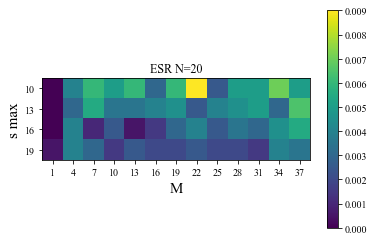

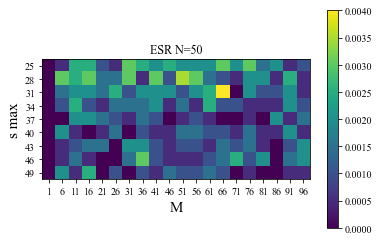

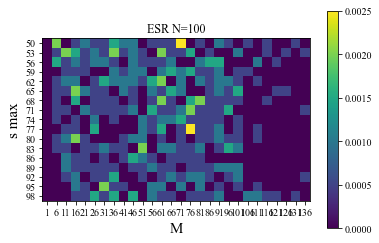

In [43]:
Ns=[20,50,100]
for N in Ns:
    name_ESR = 'Noise_unknown_s/N{}_ESR_rate_s_0.1'.format(N)
    image_ESR = np.load('{}.npy'.format(name_ESR))

    plt.figure()
    print(image_ESR.shape)
    plt.imshow(image_ESR)
    ytick = range(N//2,N,3)
    if N==20:
        xtick = range(1,2*N,3)
    elif N==50:
        xtick = range(1,2*N,5)
    else:
        xtick =range(1,141,5)
    plt.xticks(np.arange(len(xtick)),xtick)
    plt.yticks(np.arange(len(ytick)),ytick)
    plt.xlabel('M',fontsize=15)
    plt.ylabel('s max',fontsize=15)
    plt.title("ESR N={}".format(N))
    plt.colorbar()
    plt.savefig('plots/noise_unknown_s/N{}_ESR_rate_s_0.1.png'.format(N))

Image Recovery

In [44]:
from scipy.io import loadmat

In [45]:
# Please add the "Y1 Y2 Y3 and A1 A2 A3.mat" file, it is too large to be uploaded onto gradescope
m = loadmat("Y1 Y2 Y3 and A1 A2 A3.mat")
A1 = m["A1"]
A2 = m["A2"]
A3 = m["A3"]
y1 = m["y1"] # 960 x 1
y2 = m["y2"] # 1440 x 1
y3 = m["y3"] # 2880 x 1

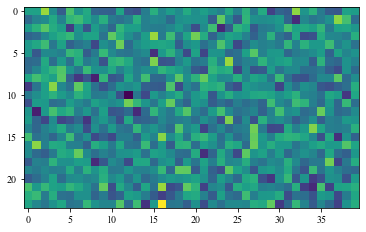

In [46]:
plt.imshow(y1.reshape((24, 40)))
plt.savefig('plots/image/Y1.png')

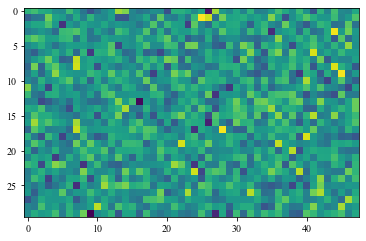

In [47]:
plt.imshow(y2.reshape((30, 48)))
plt.savefig('plots/image/Y2.png')

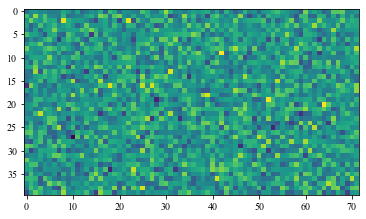

In [48]:
plt.imshow(y3.reshape((40, 72)))
plt.savefig('plots/image/Y3.png')

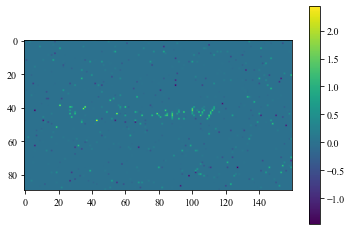

In [49]:
#OMP solution Y1
x_pre, Sup_A = OMP_rec(A1, y1)
x1_hat = np.zeros((14400, 1))
for j in range(len(Sup_A)):
        x1_hat[Sup_A[j]] = x_pre[j]
plt.imshow((x1_hat.reshape(160, 90)).T)
plt.colorbar()
plt.savefig('plots/image/X1_OMP.png')

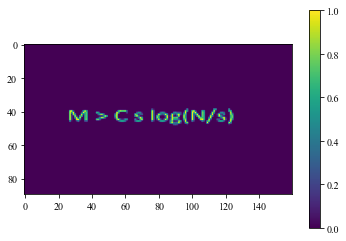

In [50]:
#OMP solution Y2
x_pre2, Sup_A2 = OMP_rec(A2, y2)
x2_hat = np.zeros((14400, 1))
for j in range(len(Sup_A2)):
        x2_hat[Sup_A2[j]] = x_pre2[j]
plt.imshow((x2_hat.reshape(160, 90)).T)
plt.colorbar()
plt.savefig('plots/image/X2_OMP.png')

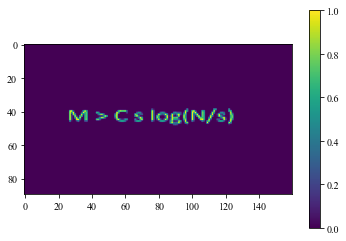

In [51]:
#OMP solution Y3
x_pre3, Sup_A3 = OMP_rec(A3, y3)
x3_hat = np.zeros((14400, 1))
for j in range(len(Sup_A3)):
        x3_hat[Sup_A3[j]] = x_pre3[j]
plt.imshow((x3_hat.reshape(160, 90)).T)
plt.colorbar()

plt.savefig('plots/image/X3_OMP.png')

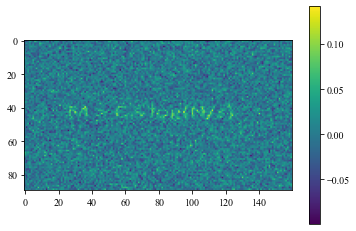

In [52]:
#LSE solution Y1
x1_hat_ls = np.linalg.pinv(A1).dot(y1)
plt.imshow(x1_hat_ls.reshape(160, 90).T)
plt.colorbar()

plt.savefig('plots/image/X1_LSE.png')

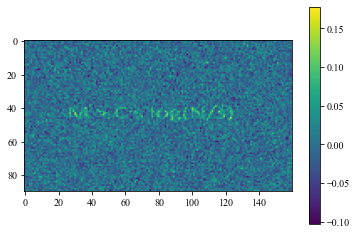

In [53]:
#LSE solution Y2
x2_hat_ls = np.linalg.pinv(A2).dot(y2)
plt.imshow(x2_hat_ls.reshape(160, 90).T)
plt.colorbar()

plt.savefig('plots/image/X2_LSE.png')

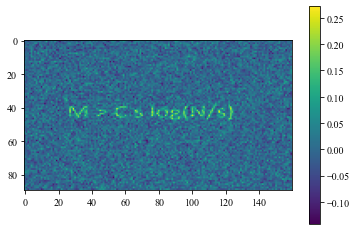

In [54]:
#LSE solution Y3
x3_hat_ls = np.linalg.pinv(A3).dot(y3)
plt.imshow(x3_hat_ls.reshape(160, 90).T)
plt.colorbar()

plt.savefig('plots/image/X3_LSE.png')